# Imports & Setup

In [1]:
import sys
sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_raw_data, encode_labels


# Load Dataset

In [2]:
df = load_raw_data("../data/raw/imdb_reviews.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Dataset Shape & Info

In [3]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Label Distribution

In [4]:
df['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Then visualize

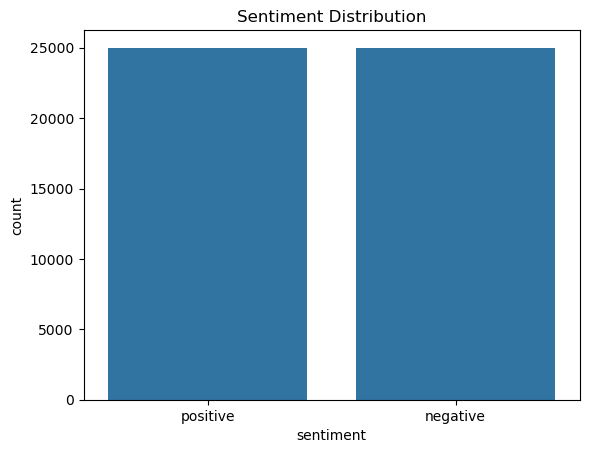

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


# Encode Labels

In [6]:
df = encode_labels(df)
df['sentiment'].value_counts()


sentiment
1    25000
0    25000
Name: count, dtype: int64

# Review Length Analysis

In [7]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

df['review_length'].describe()


count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64

# Plot

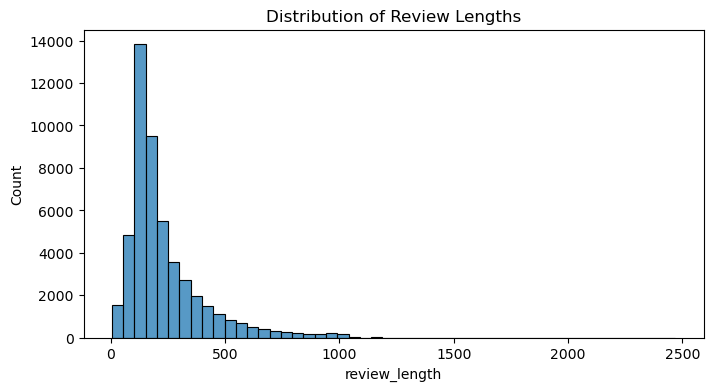

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()


# Review Length vs Sentiment

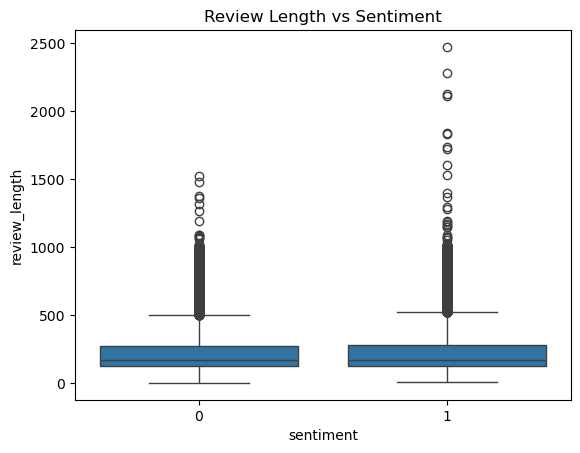

In [9]:
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length vs Sentiment")
plt.show()


# HTML Noise Check

In [10]:
df['review'].str.contains("<br").value_counts()


review
True     29200
False    20800
Name: count, dtype: int64

# Sample Reviews (Qualitative)

In [11]:
print("Positive Review Example:\n")
print(df[df['sentiment'] == 1]['review'].iloc[0])

print("\nNegative Review Example:\n")
print(df[df['sentiment'] == 0]['review'].iloc[0])


Positive Review Example:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 